In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv('Weather dataset.csv')
data.head()

,Sno,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [4]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sno     117 non-null    int64  
 1   YEAR    117 non-null    int64  
 2   JAN     117 non-null    float64
 3   FEB     117 non-null    float64
 4   MAR     117 non-null    float64
 5   APR     117 non-null    float64
 6   MAY     117 non-null    float64
 7   JUN     117 non-null    float64
 8   JUL     117 non-null    float64
 9   AUG     117 non-null    float64
 10  SEP     117 non-null    float64
 11  OCT     117 non-null    float64
 12  NOV     117 non-null    float64
 13  DEC     117 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 12.9 KB


In [5]:
data.describe()

,Sno,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,58.000000,1959.000000,18.423248,20.137949,23.434188,26.514103,28.386410,28.300940,27.369231,26.940085,26.342650,24.742051,21.765726,19.173333
std,33.919021,33.919021,0.612963,0.900944,0.862825,0.750740,0.644678,0.460603,0.345920,0.348876,0.387789,0.563152,0.634183,0.635912
min,0.000000,1901.000000,17.250000,17.790000,21.780000,24.840000,26.970000,27.330000,26.480000,26.210000,25.470000,23.520000,20.590000,17.980000
25%,29.000000,1930.000000,18.070000,19.470000,22.840000,26.000000,27.950000,28.020000,27.150000,26.730000,26.110000,24.390000,21.320000,18.780000
50%,58.000000,1959.000000,18.350000,19.990000,23.330000,26.540000,28.340000,28.250000,27.340000,26.900000,26.310000,24.670000,21.720000,19.180000
75%,87.000000,1988.000000,18.720000,20.550000,23.930000,26.910000,28.820000,28.580000,27.530000,27.150000,26.500000,24.920000,22.150000,19.550000
max,116.000000,2017.000000,20.920000,23.580000,26.610000,29.560000,30.780000,29.880000,28.470000,28.170000,28.110000,27.240000,23.920000,21.890000


In [6]:
# transpose the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sno,117.0,58.000000,33.919021,0.00,29.00,58.00,87.00,116.00
YEAR,117.0,1959.000000,33.919021,1901.00,1930.00,1959.00,1988.00,2017.00
JAN,117.0,18.423248,0.612963,17.25,18.07,18.35,18.72,20.92
FEB,117.0,20.137949,0.900944,17.79,19.47,19.99,20.55,23.58
MAR,117.0,23.434188,0.862825,21.78,22.84,23.33,23.93,26.61
APR,117.0,26.514103,0.750740,24.84,26.00,26.54,26.91,29.56
MAY,117.0,28.386410,0.644678,26.97,27.95,28.34,28.82,30.78
JUN,117.0,28.300940,0.460603,27.33,28.02,28.25,28.58,29.88
JUL,117.0,27.369231,0.345920,26.48,27.15,27.34,27.53,28.47
AUG,117.0,26.940085,0.348876,26.21,26.73,26.90,27.15,28.17


In [7]:
#check that if our dataset have null values or not
data.isnull().head(10)

,Sno,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#number of null values our dataset has
data.isnull().sum()

Sno     0
YEAR    0
JAN     0
FEB     0
MAR     0
APR     0
MAY     0
JUN     0
JUL     0
AUG     0
SEP     0
OCT     0
NOV     0
DEC     0
dtype: int64

In [13]:
#replace the 0 value with the NAN value
data_copy = data.copy(deep = True)
data_copy[['JAN','FEB','MAR']] = data_copy[['APR','MAY','JUN']].replace(0,np.NaN)

# Showing the Count of NANs
print(data_copy.isnull().sum())

Sno     0
YEAR    0
JAN     0
FEB     0
MAR     0
APR     0
MAY     0
JUN     0
JUL     0
AUG     0
SEP     0
OCT     0
NOV     0
DEC     0
dtype: int64


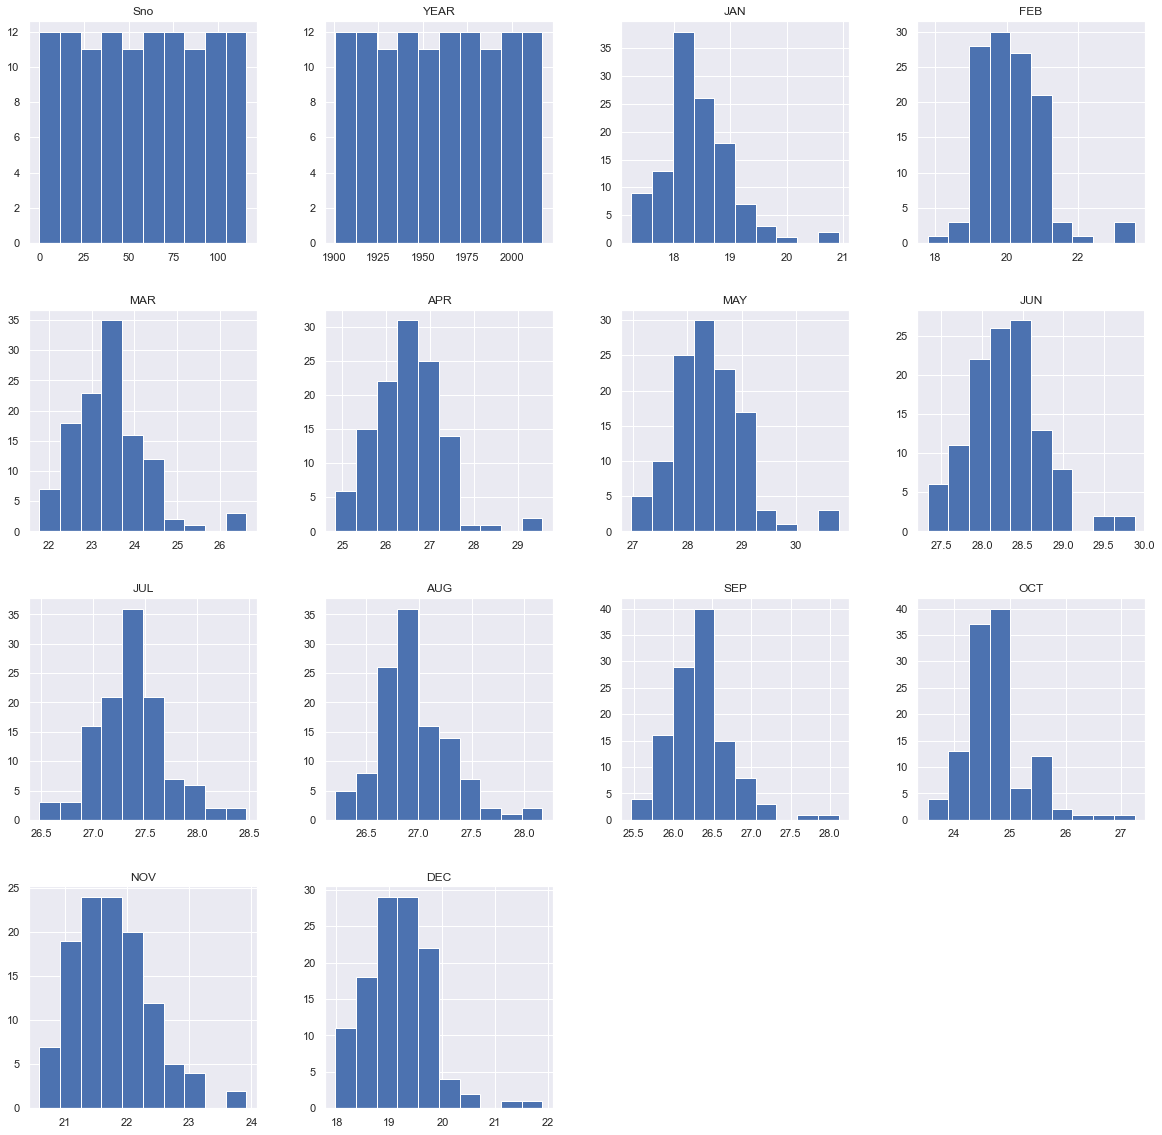

In [14]:
#Plotting the data distribution plots before removing null values
p = data.hist(figsize = (20,20))

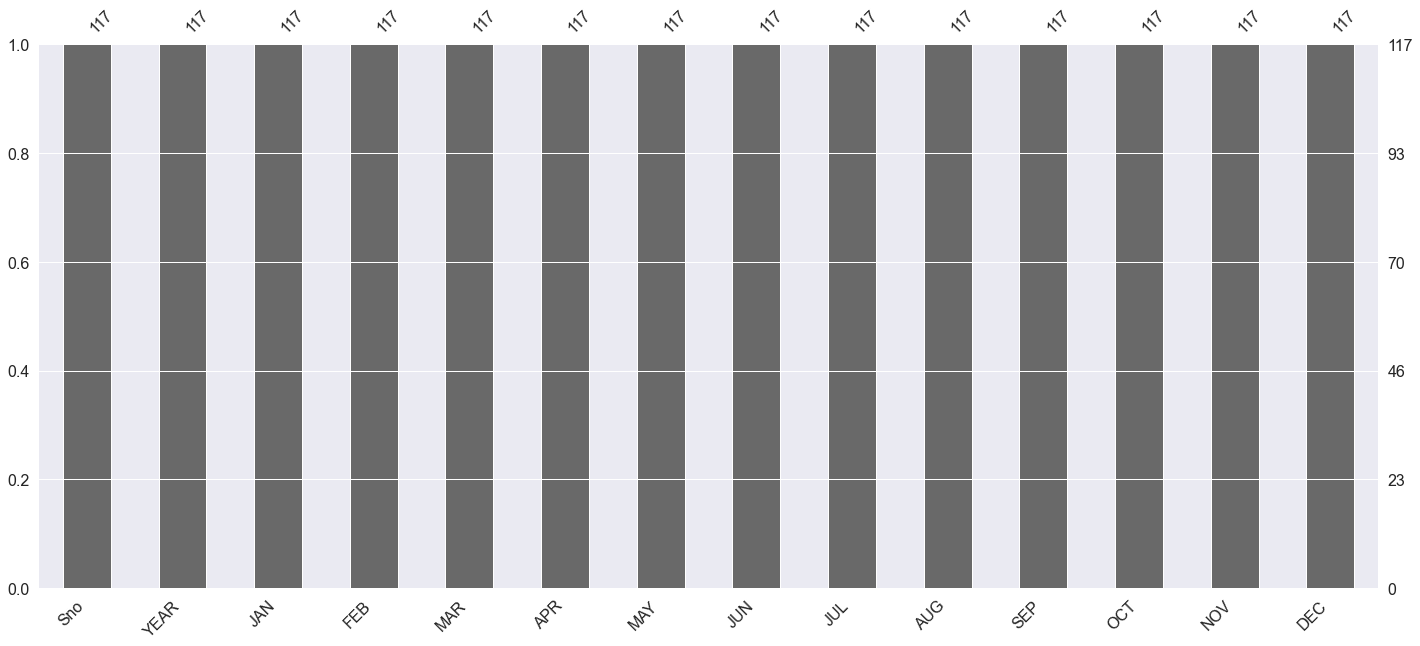

In [15]:
#Plotting Null Count Analysis Plot
p = msno.bar(data)

26.26    7
26.19    3
26.61    3
26.34    3
26.48    3
        ..
25.83    1
26.37    1
26.24    1
26.80    1
27.04    1
Name: SEP, Length: 74, dtype: int64


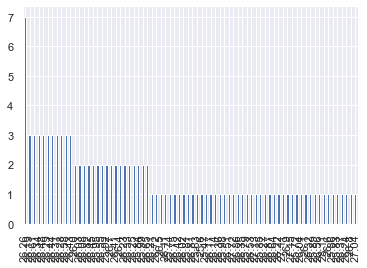

In [17]:
color_wheel = {1: "#0642cf", 2: "#7bc031"}
colors = data["SEP"].map(lambda x: color_wheel.get(x + 1))
print(data.SEP.value_counts())
p=data.SEP.value_counts().plot(kind="bar")

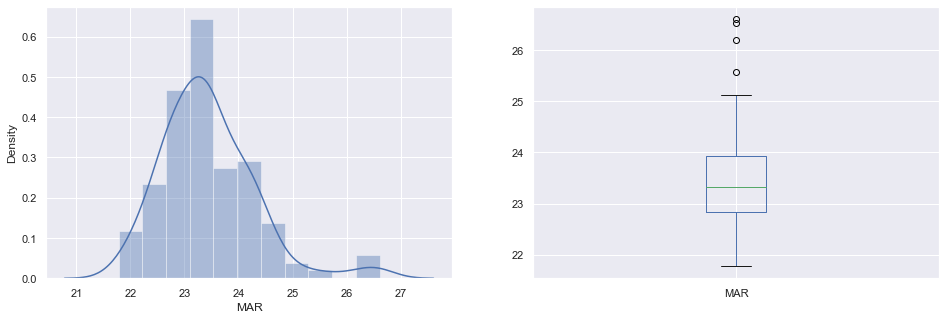

In [19]:
plt.subplot(121), sns.distplot(data['MAR'])
plt.subplot(122), data['MAR'].plot.box(figsize=(16,5))
plt.show()

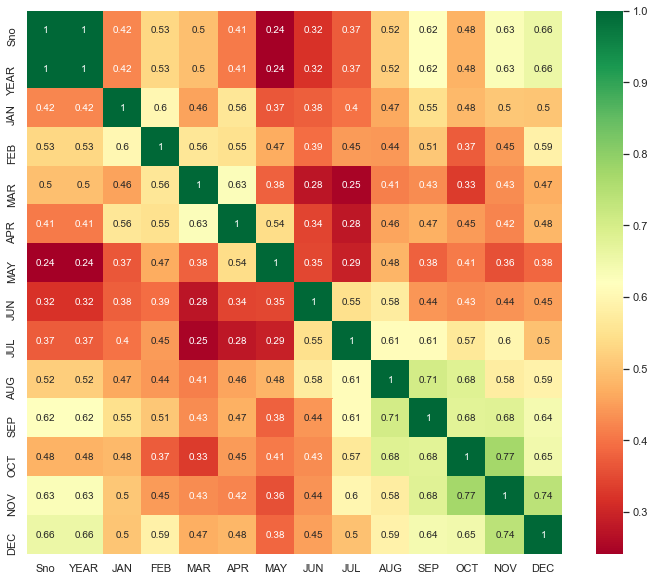

In [20]:
#Correlation between all the features before cleaning
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')

In [21]:
data_copy.head()

,Sno,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,26.41,28.28,28.60,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,26.54,28.68,28.44,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,26.03,27.93,28.41,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,26.73,27.83,27.85,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,24.84,28.32,28.69,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [22]:
#After Standard scaling
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data_copy.drop(["YEAR"],axis = 1),), columns=['Sno','JAN','FEB',
                                                                                  'MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
X.head()

,Sno,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,-1.717310,-0.139263,-0.165770,0.652072,-0.139263,-0.165770,0.652072,0.350626,0.114901,-0.214047,0.602683,-0.056577,-0.352712
1,-1.687701,0.034644,0.457364,0.303207,0.034644,0.457364,0.303207,-0.230029,0.316408,-1.016890,-0.663500,-0.690022,-0.621194
2,-1.658092,-0.647607,-0.711012,0.237795,-0.647607,-0.711012,0.237795,1.947428,-0.892635,-0.006862,-0.306829,-1.275959,-1.395055
3,-1.628483,0.288816,-0.866795,-0.983232,0.288816,-0.866795,-0.983232,-1.536503,-0.604768,-1.301770,-0.681333,-1.101762,-0.526436
4,-1.598875,-2.239528,-0.103456,0.848308,-2.239528,-0.103456,0.848308,0.873216,1.525451,-0.136353,2.528707,0.481852,-0.731746


In [23]:
y = data_copy.YEAR
y

0      1901
1      1902
2      1903
3      1904
4      1905
       ... 
112    2013
113    2014
114    2015
115    2016
116    2017
Name: YEAR, Length: 117, dtype: int64

In [24]:
#Splitting the dataset
X = data.drop('YEAR', axis=1)
y = data['YEAR']

In [25]:
#split the data into training and testing data using the train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

#Building the model using RandomForest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [26]:
#check the accuracy of the model on the training dataset
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [27]:
# training dataset our model is overfitted
#Getting the accuracy score for Random Forest
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.0


In [28]:
#confusion matrix of random forest model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
              precision    recall  f1-score   support

        1902       0.00      0.00      0.00       0.0
        1903       0.00      0.00      0.00       1.0
        1906       0.00      0.00      0.00       1.0
        1909       0.00      0.00      0.00       0.0
        1911       0.00      0.00      0.00       0.0
        1912       0.00      0.00      0.00       1.0
        1913       0.00      0.00      0.00       1.0
        1914       0.00      0.00      0.00       1.0
        1916       0.00      0.00      0.00       1.0
        1919       0.00      0.00      0.00       1.0
        1921       0.00      0.00      0.00       1.0
        1922       0.00      0.00      0.00       0.0
        1923       0.00      0.00      0.00       1.0
        1924       0.00      0.00      0.00       0.0
        1927       0.00      0.00      0.00       1.0
        1928   

In [29]:
#Building the model using DecisionTree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
#Getting the accuracy score for Decision Tree
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.0


In [31]:
#confusion matrix of the decision tree model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
              precision    recall  f1-score   support

        1902       0.00      0.00      0.00       0.0
        1903       0.00      0.00      0.00       1.0
        1904       0.00      0.00      0.00       0.0
        1906       0.00      0.00      0.00       1.0
        1909       0.00      0.00      0.00       0.0
        1912       0.00      0.00      0.00       1.0
        1913       0.00      0.00      0.00       1.0
        1914       0.00      0.00      0.00       1.0
        1915       0.00      0.00      0.00       0.0
        1916       0.00      0.00      0.00       1.0
        1919       0.00      0.00      0.00       1.0
        1921       0.00      0.00      0.00       1.0
        1922       0.00      0.00      0.00       0.0
        1923       0.00      0.00      0.00       1.0
        1925       0.00      0.00      0.00       0.0
        1927   

In [34]:
#Building model using XGBoost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77], got [1901 1902 1904 1905 1907 1908 1909 1910 1911 1915 1917 1918 1920 1922
 1924 1925 1926 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938
 1939 1940 1943 1945 1948 1949 1950 1951 1952 1954 1956 1957 1958 1961
 1962 1964 1965 1967 1968 1969 1970 1971 1973 1974 1976 1977 1982 1983
 1984 1985 1987 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2004 2005 2006 2007 2012 2013 2014 2016]